In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import label

In [2]:
df = pd.read_csv('.\\data\\binance-BTCUSDT-1m-new.csv')
df['Time_UTC_Start'] = pd.to_datetime(df['Time_UTC_Start'])
df.index = df['Time_UTC_Start']
df.drop_duplicates(keep = 'first', inplace=True)
df.drop(columns=['Time_UTC_Start', 'Timestamp'], inplace=True)
df

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Base_asset_volume,Quote_asset_volume.1,label
Time_UTC_Start,,,,,,,,,,,
2018-07-18 10:34:00,7394.60,7394.60,7382.07,7385.00,27.539346,1531910099999,2.034712e+05,217,10.883414,8.040716e+04,0.0
2018-07-18 10:35:00,7385.00,7385.00,7378.27,7379.18,16.894401,1531910159999,1.247068e+05,184,10.320014,7.618136e+04,0.0
2018-07-18 10:36:00,7378.27,7379.18,7370.00,7372.47,44.158140,1531910219999,3.256312e+05,229,21.079610,1.554834e+05,0.0
2018-07-18 10:37:00,7370.03,7377.00,7367.22,7373.95,46.129979,1531910279999,3.399929e+05,300,33.766038,2.488708e+05,1.0
2018-07-18 10:38:00,7373.95,7374.00,7369.33,7370.00,11.282937,1531910339999,8.318349e+04,142,7.941090,5.855096e+04,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 07:49:00,35920.00,35923.50,35913.03,35913.04,12.096760,1651909799999,4.345057e+05,388,7.151330,2.568724e+05,0.0
2022-05-07 07:50:00,35913.04,35922.47,35913.03,35922.46,24.311140,1651909859999,8.731911e+05,575,9.917070,3.561851e+05,1.0
2022-05-07 07:51:00,35922.46,35950.19,35922.46,35940.01,72.302490,1651909919999,2.598789e+06,782,32.884100,1.181822e+06,1.0


In [3]:
def residual_decompose(cols=[], subtract_resid=[], freq='T'):
    l = []
    for i in range(len(cols)):
        data = df[cols[i]]
        data.dropna(inplace=True)
        r = data.asfreq(freq).fillna(method='ffill')
        result = sm.tsa.seasonal_decompose(r, model='ad')
        x = result.trend + result.seasonal
        if subtract_resid[i] == False:
            x += result.resid
        x.dropna(inplace=True)
        l.append(pd.DataFrame(x).rename(columns={0: cols[i]}))
    return pd.concat(l, axis=1)

In [4]:
X = residual_decompose(['Close', 'Open', 'Volumn', 'High', 'Low', 'Quote_asset_volume', 'Number_of_trades', 'Base_asset_volume'],
                       [True, False, True, False, True, False, False, True], 'T')
X

,Close,Open,Volumn,High,Low,Quote_asset_volume,Number_of_trades,Base_asset_volume
Time_UTC_Start,,,,,,,,
2018-07-18 11:04:00,7398.650186,7410.00,27.450158,7410.00,7393.397884,212766.854407,160.0,15.296257
2018-07-18 11:05:00,7399.190933,7409.77,28.364856,7409.78,7393.351615,124201.809975,185.0,15.726955
2018-07-18 11:06:00,7399.715681,7406.24,26.513863,7407.79,7394.559560,190317.991351,180.0,14.731599
2018-07-18 11:07:00,7400.397331,7401.06,25.188251,7404.00,7395.532513,112423.943659,142.0,14.096249
2018-07-18 11:08:00,7401.375931,7402.83,24.538919,7402.84,7396.619444,237736.396315,173.0,13.889249
...,...,...,...,...,...,...,...,...
2022-05-07 07:19:00,35850.473059,35858.69,22.220275,35867.81,35843.193154,443502.805952,443.0,9.775503
2022-05-07 07:20:00,35851.552060,35867.80,22.998743,35870.00,35843.674672,252072.128009,310.0,10.371966
2022-05-07 07:21:00,35852.786981,35866.52,22.900766,35866.52,35845.606004,334416.867084,428.0,10.299318


In [5]:
def label(df, t=1):
    _df = df.copy()
    length = _df.shape[0]
    op = _df['Open'].values.reshape(length,1)
    cl = _df['Close'].values.reshape(length,1 )
    v = np.ones((length, 1)) * (op < cl)
    _df['label'] = v
    return _df

In [15]:
X = label(X)
X

,Close,Open,Volumn,High,Low,Quote_asset_volume,Number_of_trades,Base_asset_volume,label
Time_UTC_Start,,,,,,,,,
2018-07-18 11:04:00,7398.650186,7410.00,27.450158,7410.00,7393.397884,212766.854407,160.0,15.296257,0.0
2018-07-18 11:05:00,7399.190933,7409.77,28.364856,7409.78,7393.351615,124201.809975,185.0,15.726955,0.0
2018-07-18 11:06:00,7399.715681,7406.24,26.513863,7407.79,7394.559560,190317.991351,180.0,14.731599,0.0
2018-07-18 11:07:00,7400.397331,7401.06,25.188251,7404.00,7395.532513,112423.943659,142.0,14.096249,0.0
2018-07-18 11:08:00,7401.375931,7402.83,24.538919,7402.84,7396.619444,237736.396315,173.0,13.889249,0.0
...,...,...,...,...,...,...,...,...,...
2022-05-07 07:19:00,35850.473059,35858.69,22.220275,35867.81,35843.193154,443502.805952,443.0,9.775503,0.0
2022-05-07 07:20:00,35851.552060,35867.80,22.998743,35870.00,35843.674672,252072.128009,310.0,10.371966,0.0
2022-05-07 07:21:00,35852.786981,35866.52,22.900766,35866.52,35845.606004,334416.867084,428.0,10.299318,0.0


In [7]:
import gc
def base_feat(df, base_cols=[], 
                  time_delta=1, 
                  window_lookback=[5, 10, 60, 200, 500],
                  agg_func=['min', 'max', 'mean', 'median', 'var']):
    """
    This func use for create formal features base on a list of columns
    Params:
        df (Pandas DF): close_dataframe input
        base_cols (list): list of columns you want to create feature by this function
        time_delta (int): time between 2 records (minutes)
        window_lookback (list): list of integer time the time_delta. For example time_delta = 15 window_lookback = [1, 2]
                                so the time lookback is 15 minutes and 15*2=30 minutes
        agg_func (list): aggregate func you use for rolling
    """
        
    for col in base_cols:
        for lookback in window_lookback:
            dict_agg_func = {'_'.join([agg, col, str(time_delta * lookback) + 'M']): agg for agg in agg_func}
            df_feat = df[col].shift(1).rolling(lookback).agg(dict_agg_func)
            df = pd.concat([df, df_feat], axis=1)
            del df_feat
            gc.collect()
#     for col in df.columns:
#         if '1' in col and 'var' in col:
#             del df[col]
    df = df.dropna(axis=0)
    return df

In [16]:
def generate_train_test_set(X, cols=[], window_lookback=[], agg_func=[], train_size=0.85, normalize=True):
    df_feat = base_feat(X, cols, 1, window_lookback, agg_func)
    if normalize:
        from sklearn import preprocessing
        for f in df_feat.columns[len(cols)+1:]:
            scaler = preprocessing.StandardScaler()
            df_feat[f] = scaler.fit_transform(df_feat[[f]])
    y = df_feat['label'].values
    X_data = df_feat.values
    
    X_train, X_test = (X_data[:int(X_data.shape[0] * train_size), len(cols)+1:],
                       X_data[int(X_data.shape[0] * train_size):, len(cols)+1:])
    
    y_train, y_test = y[:int(y.shape[0] * train_size)], y[int(y.shape[0] * train_size):]
    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = generate_train_test_set(X,
                                                          ['Close', 'Open', 'Volumn', 'High', 'Low', 'Quote_asset_volume', 'Number_of_trades', 'Base_asset_volume'],
                                                           [5, 10, 60, 180, 300],
                                                          ['min', 'max', 'mean', 'var', 'median'], 0.80, True)

In [18]:
X_train.shape

(1599712, 200)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, 
                         class_weight=None, random_state=1234, solver='lbfgs', max_iter=100000, multi_class='auto', verbose=1)

In [20]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.8min finished


LogisticRegression(C=0.1, max_iter=100000, random_state=1234, verbose=1)

In [21]:
y_pred = clf.predict_proba(X_test)[:, 1]
y_pred

array([0.51474602, 0.46440186, 0.3712094 , ..., 0.54104004, 0.52172628,
       0.51904088])

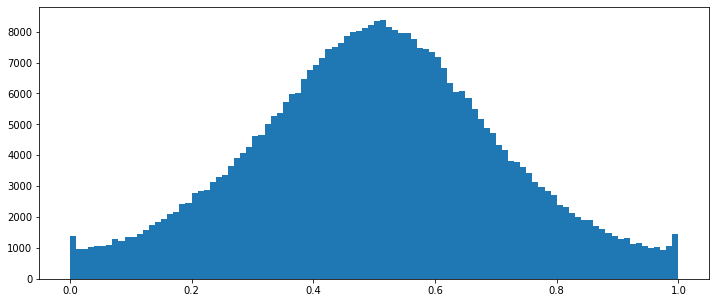

In [22]:
plt.figure(figsize=(12, 5))
plt.hist(y_pred, bins=100);

In [23]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_pred)

0.8591527503933991